In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r"C:\Users\Lavan\Downloads\datafiles\Visadataset.csv"

In [3]:
visa_df = pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [4]:
cat_column=visa_df.select_dtypes(include='object').columns
num_column=visa_df.select_dtypes(exclude='object').columns

# Bi variate analysis

- we already seen uni variate analysis
- we performed the categorical columns analysis
    - frequency table(value counts)
    - bar chat
    - relative frequency table(value counts normalized form)
           - pie chart
- we performed the numerical column analysis
    - histogram
    - distribution plots
    - box plot
    - outlier analysis
    - filling the outliers

- now we will do categorical-categorical analaysis
- numerical-numerical analysis
- categorical-numerical analysis  

# categorical - categorical

- lets consider two columns
  - continent
  - case status

In [5]:
# continent 
# aug 7 th video second half

visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [6]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

# task

-find the certifieed observations continent wise
- find the denied observations continent wise

In [7]:
# step-1: make the first condition continent=='Asia'
# step-2 : make the second condition case_status == 'certified'
# step-3: make the third condition:con1&con2
# step-4: then retrive the dataframe and take the count

In [8]:
continents=visa_df['continent'].unique()
certified_list=[]
for i in continents:
    con1 = visa_df['continent'] == i
    con2 = visa_df['case_status'] == 'Certified'
    con3 = con1&con2
    count=len(visa_df[con3])
    print(f"the number of cerified visa from{i} is {count}")
    certified_list.append(count)

the number of cerified visa fromAsia is 11012
the number of cerified visa fromAfrica is 397
the number of cerified visa fromNorth America is 2037
the number of cerified visa fromEurope is 2957
the number of cerified visa fromSouth America is 493
the number of cerified visa fromOceania is 122


In [9]:
con1 = visa_df['continent'] == 'Asia'
con2 = visa_df['case_status'] == 'Certified'
con3 = con1&con2
len(visa_df[con3])


11012

In [10]:
visa_df['continent'].unique()
visa_df['continent'].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [11]:
continents=visa_df['continent'].unique()
certified_list,denied_list=[],[]
for i in continents:
    con1 = visa_df['continent'] == i
    con2 = visa_df['case_status'] == 'Certified'
    con3 = visa_df['case_status'] == 'Denied'
    cert_con = con1&con2
    den_con = con1&con3
    
    cert_count=len(visa_df[cert_con])
    den_count=len(visa_df[den_con])
    print(f"the number of cerified visa from{i} is {cert_count}")
    print(f"the number of cerified visa from{i} is {den_count}")
    certified_list.append(cert_count)
    denied_list.append(den_count)

the number of cerified visa fromAsia is 11012
the number of cerified visa fromAsia is 5849
the number of cerified visa fromAfrica is 397
the number of cerified visa fromAfrica is 154
the number of cerified visa fromNorth America is 2037
the number of cerified visa fromNorth America is 1255
the number of cerified visa fromEurope is 2957
the number of cerified visa fromEurope is 775
the number of cerified visa fromSouth America is 493
the number of cerified visa fromSouth America is 359
the number of cerified visa fromOceania is 122
the number of cerified visa fromOceania is 70


In [12]:
# df 
continents
certified_list
cols=['continents','certified']
df1=pd.DataFrame(zip(continents,certified_list),columns=cols)
df1

,continents,certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [13]:
pd.DataFrame(zip(continents,certified_list))

,0,1
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [14]:
cols=['continents','certified']
df2=pd.DataFrame(zip(continents,denied_list),columns=cols)
df2

,continents,certified
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [15]:
cols=['certified','denied']
df3=pd.DataFrame(zip(certified_list,denied_list),index=continents,columns=cols)
df3

,certified,denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


# cross tab

- the above data frame we can make by using a method: ** cross tab**
- it is available in pandas
- it takes two arguments
   - index
   - column
- in above data frame index column is : * continent *
- in above data frame data column is : case_statusm

In [16]:
idx_column = visa_df['continent']
data_column= visa_df['case_status']
pd.crosstab(visa_df['continent'],visa_df['case_status'])

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [17]:
idx_column = visa_df['continent']
data_column= visa_df['case_status']
df4=pd.crosstab(idx_column,data_column)
df4

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

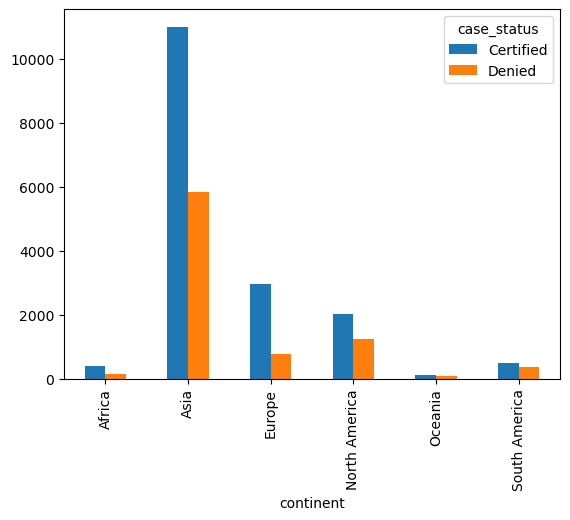

In [18]:
df4.plot(kind='bar')

<Axes: >

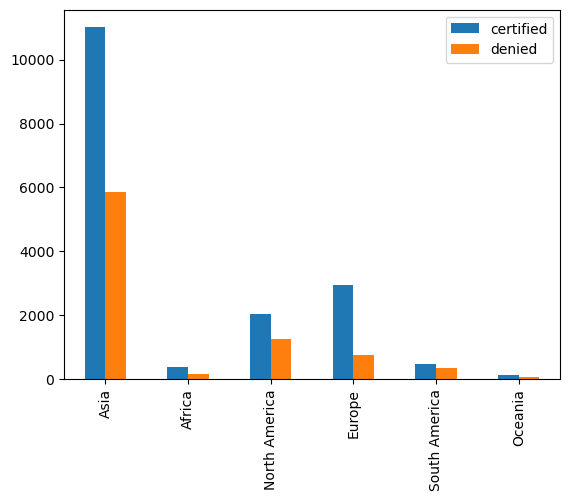

In [19]:
df3.plot(kind='bar')

# multivariate analysis

- education 

- continent

- case_status

- we already know from asia there 11k accepted visa
- in that i want futher break down based on education
- here also pd.cross tab
   - first fix your index of any one column out of three column
   - then keep two column  in a list and pass as data column



In [20]:
idx_column = visa_df['continent']
data_column= [visa_df['education_of_employee'],visa_df['case_status']]
df5=pd.crosstab(idx_column,data_column)
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

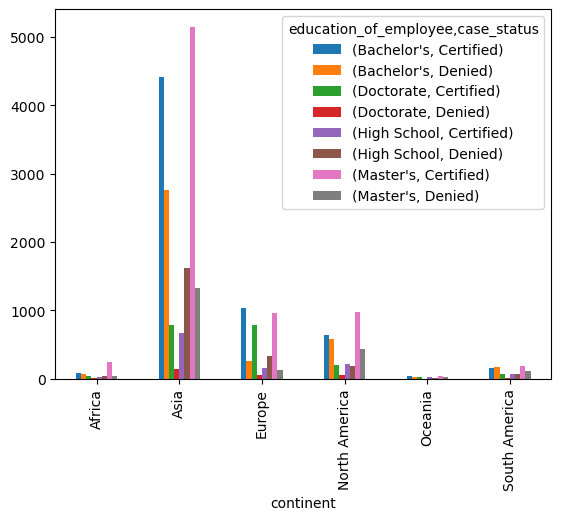

In [21]:
df5.plot(kind='bar')

In [30]:
cat_column=visa_df.select_dtypes(include='object').columns
num_column=visa_df.select_dtypes(exclude='object').columns
num_column

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

# numerical vs numerical

- to understand numerical columns relation we need to plot scatter plots
- scatter plot gives the relation between two numerical columns
- bar chart - pie chart - histogram - scatter plots
- scatter plot under matplotlib package
- plt.scatter

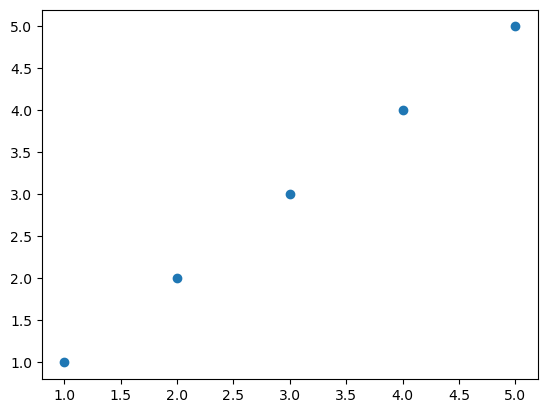

In [22]:
x = [1,2,3,4,5]
y = [1,2,3,4,5]
plt.scatter(x,y)

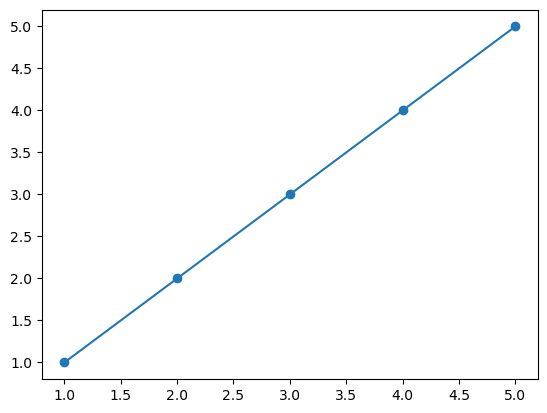

In [24]:
x = [1,2,3,4,5]
y = [1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

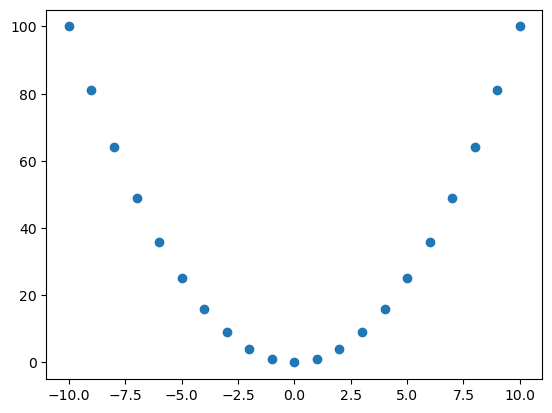

In [25]:
x = [i for i in range(-10,11)]
y = [i*i for i in x]
plt.scatter(x,y)



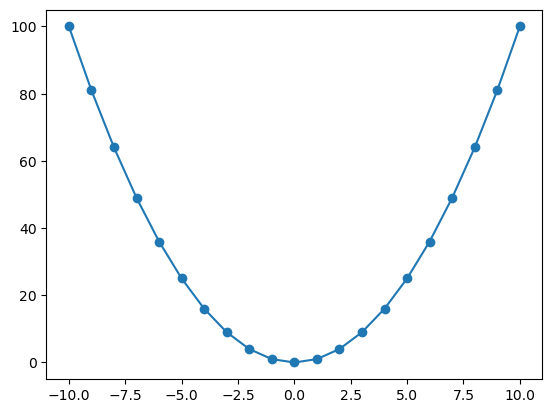

In [26]:
x = [i for i in range(-10,11)]
y = [i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [ ]:
# step-1: read one numerical column
# step-2: read another numerical column
# apply the scatter plot

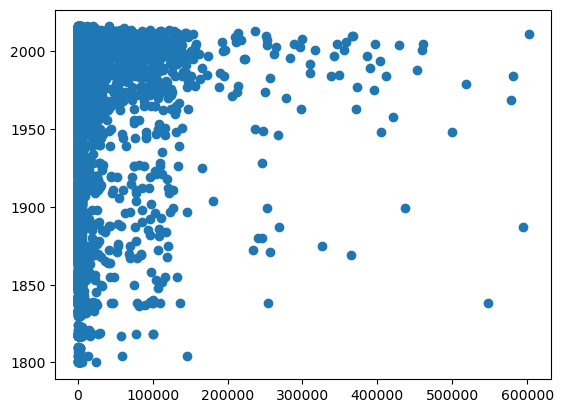

In [37]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)

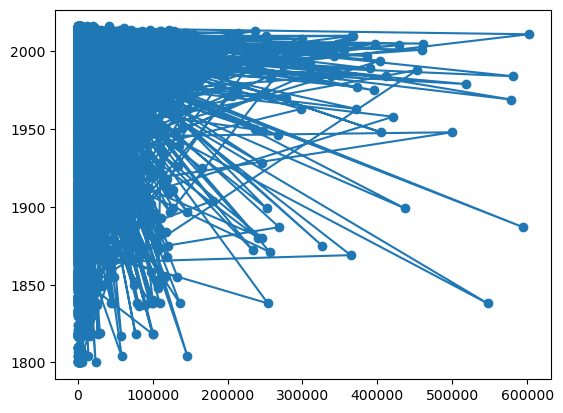

In [36]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)
plt.plot(col1,col2)
plt.show()

Text(0, 0.5, 'prevailing_wage')

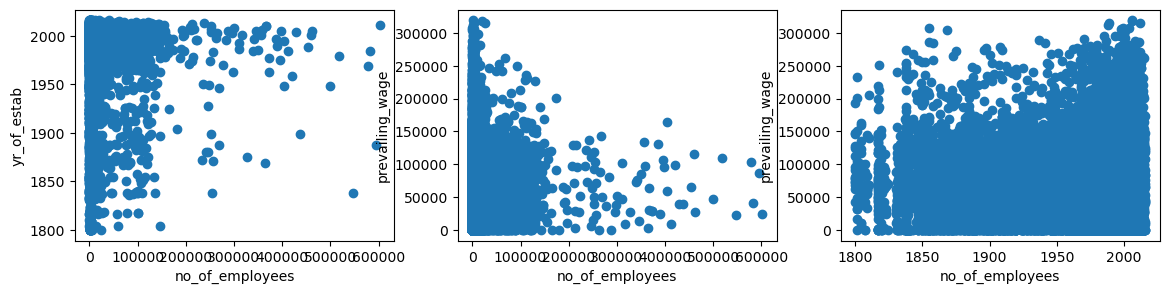

In [38]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
####################3
plt.subplot(1,3,2).scatter(col1,col3)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')
#####################################
plt.subplot(1,3,3).scatter(col2,col3)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')


In [ ]:
- implement the covariance function

- covariance vs correlation
    - covariance will tell about the columns have relation or not
    - covariance will explan about relation status
         - postive relation
         - negative relation
         - no relation

- correlation tells about how much relation between two variable
        - it denotes with 'r'
        - r varies from -1 to 1
        - -1 to 0 indicates negative relation quantity
        -  0 to 1 indicates positive relation quantity
        - 0 indicates no relation

      r = formala


# method name : corr

In [40]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [1]:
# heat map

- heat map is one of the important visualization method,to show the matrix form of 
- it is under  ** seaborn** package
- in every matrix we have heighest values and lowest values available
- heat meap will give colour visulization
- also it provides color bar,which colour indicatesm

SyntaxError: invalid syntax (103217019.py, line 3)

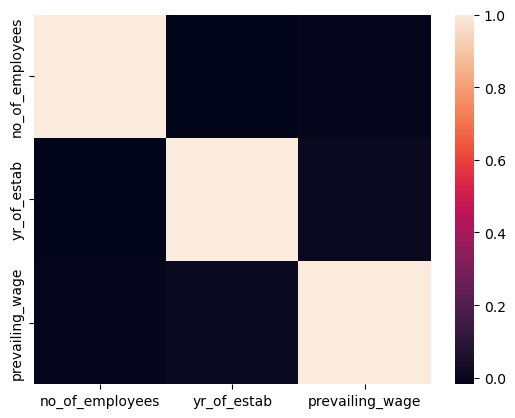

In [42]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data)
plt.show()

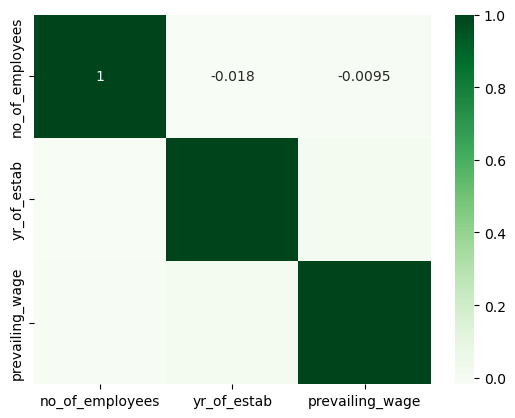

In [47]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='Greens')
plt.show()

- by seeing the graphs we might not say the relation status
- it is best practice get the percentage of relation using correlation
- all 3 columns having approximately zero percentage of relation
- which indicates all the columns having no relation
- no relation means independent each other
- in ML we expect the input columns should be independent each other
- corr method gives matrix view
- we have 3 columns 3*3 total 9 fields
- if a data has 20 columns then 20*20 total 400 fileds
- thats why always go with heat map visulaization